해당 데이터에는 66개의 칼럼이 존재한다.

- ID : 해당 데이터에서의 고유한 ID
- Age : 나이
- Height : 신장(cm)
- Weight : 몸무게(kg)
- Position : 선수의 포지션
- PreferredFoot : 선수의 주발(왼발/오른발)
- AttackingWorkRate : 공격적 플레이에 대한 선호도
- DefensiveWorkRate : 수비적 플레이에 대한 선호도
- PaceTotal : 속력 및 가속력 종합
- ShootingTotal : 선수의 슈팅 능력
- PassingTotal : 전체적인 패스 능력
- Composure : 침착함에 대한 점수
- ...

Target. Prospect : 선수의 유망 여부(0/1)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# 데이터 불러오기

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

# 데이터 확인

In [3]:
train.describe()

,Age,Height,Weight,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Crossing,...,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating,Prospect
count,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,...,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.00000,3019.000000,3019.000000,3019.000000
mean,19.632329,180.892348,73.081153,5.760521,4.292595,4.080918,4.708363,3.816096,4.549276,4.371896,...,4.748056,4.961191,4.874432,4.508399,4.874432,4.852789,4.33072,4.852789,1.424188,0.361047
std,1.235638,6.800187,6.539758,1.298024,1.624982,1.301538,1.366596,2.029423,1.414989,1.790045,...,1.677262,1.814854,1.815744,1.809723,1.815744,1.877633,1.88076,1.877633,1.606925,0.480384
min,16.000000,160.000000,49.000000,0.724600,0.526300,0.000000,0.000000,0.000000,0.000000,0.113600,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.250000,0.000000
25%,19.000000,176.000000,69.000000,4.927500,3.092100,3.235300,3.939400,1.842100,3.606600,3.295500,...,4.109600,4.459500,4.225400,3.571400,4.225400,4.000000,3.05560,4.000000,0.750000,0.000000
50%,20.000000,180.000000,73.000000,5.797100,4.605300,4.117600,4.848500,4.210500,4.590200,4.772700,...,5.068500,5.405400,5.211300,4.857100,5.211300,5.285700,4.58330,5.285700,0.875000,0.000000
75%,21.000000,185.500000,77.000000,6.666700,5.526300,5.000000,5.606100,5.526300,5.573800,5.681800,...,5.890400,6.081100,6.056300,5.857100,6.056300,6.142900,5.83330,6.142900,1.125000,1.000000
max,21.000000,204.000000,99.000000,9.710100,9.868400,8.235300,9.393900,8.684200,9.344300,8.522700,...,9.315100,9.189200,9.014100,9.142900,9.014100,9.142900,9.02780,9.142900,8.625000,1.000000


**예측할 feature 확인하기**

In [4]:
train.loc[:, 'Prospect']

0       0
1       0
2       0
3       0
4       0
       ..
3014    1
3015    0
3016    0
3017    0
3018    0
Name: Prospect, Length: 3019, dtype: int64

**데이터 상관관계 확인**

상관관계가 높은 변수들은 서로 유사한 정보를 담고 있을 가능성이 높기 때문에, 이러한 변수들 중 하나를 선택하거나 새로운 변수를 생성해야 할 수 있다.

In [5]:
not_numeric = ['ID', 'Position', 'PreferredFoot', 'AttackingWorkRate', 'DefensiveWorkRate']
numeric_df = train.drop(columns=not_numeric)
corr = numeric_df.corr()
corr

,Age,Height,Weight,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Crossing,...,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating,Prospect
Age,1.000000,0.018988,0.080822,0.107841,0.093375,0.172423,0.146883,0.136092,0.274144,0.129849,...,0.133717,0.112939,0.149774,0.152902,0.149774,0.146105,0.144324,0.146105,0.019478,-0.582909
Height,0.018988,1.000000,0.743838,-0.384139,-0.097888,-0.172657,-0.295885,0.039815,0.440999,-0.480650,...,-0.390171,-0.456783,-0.303466,-0.201535,-0.303466,-0.251447,-0.062397,-0.251447,0.372424,0.010178
Weight,0.080822,0.743838,1.000000,-0.310781,-0.063294,-0.150032,-0.239219,0.035654,0.479184,-0.408269,...,-0.328367,-0.383186,-0.252259,-0.164336,-0.252259,-0.209222,-0.038580,-0.209222,0.324048,-0.025572
PaceTotal,0.107841,-0.384139,-0.310781,1.000000,0.312042,0.290279,0.557821,-0.094054,0.016908,0.564574,...,0.467228,0.605882,0.363656,0.220808,0.363656,0.301152,0.095544,0.301152,-0.306952,-0.093176
ShootingTotal,0.093375,-0.097888,-0.063294,0.312042,1.000000,0.602866,0.730978,-0.553480,-0.115810,0.141884,...,0.163928,0.250062,-0.241893,-0.283079,-0.241893,-0.325732,-0.464566,-0.325732,0.255293,-0.071425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LBRating,0.146105,-0.251447,-0.209222,0.301152,-0.325732,0.161350,0.100034,0.797579,0.386306,0.710517,...,0.826768,0.730987,0.992579,0.983404,0.992579,1.000000,0.954882,1.000000,-0.745881,-0.144201
CBRating,0.144324,-0.062397,-0.038580,0.095544,-0.464566,0.042816,-0.085025,0.900099,0.529902,0.506513,...,0.675316,0.532908,0.917685,0.959100,0.917685,0.954882,1.000000,0.954882,-0.638604,-0.141780
RBRating,0.146105,-0.251447,-0.209222,0.301152,-0.325732,0.161350,0.100034,0.797579,0.386306,0.710517,...,0.826768,0.730987,0.992579,0.983404,0.992579,1.000000,0.954882,1.000000,-0.745881,-0.144201
GKRating,0.019478,0.372424,0.324048,-0.306952,0.255293,0.196670,0.063342,-0.306770,-0.028701,-0.667026,...,-0.751010,-0.778403,-0.768249,-0.692050,-0.768249,-0.745881,-0.638604,-0.745881,1.000000,0.006496


In [6]:
abs_corr = abs(corr['Prospect'])
abs_corr = abs_corr.sort_values(ascending=False)
top_10_corr = abs_corr.iloc[:10]
top_10_corr

Prospect            1.000000
Age                 0.582909
Reactions           0.235083
PhysicalityTotal    0.226080
Stamina             0.189974
Strength            0.146012
LWBRating           0.145756
RWBRating           0.145756
CDMRating           0.144564
LBRating            0.144201
Name: Prospect, dtype: float64

**데이터 상관관계 히트맵**

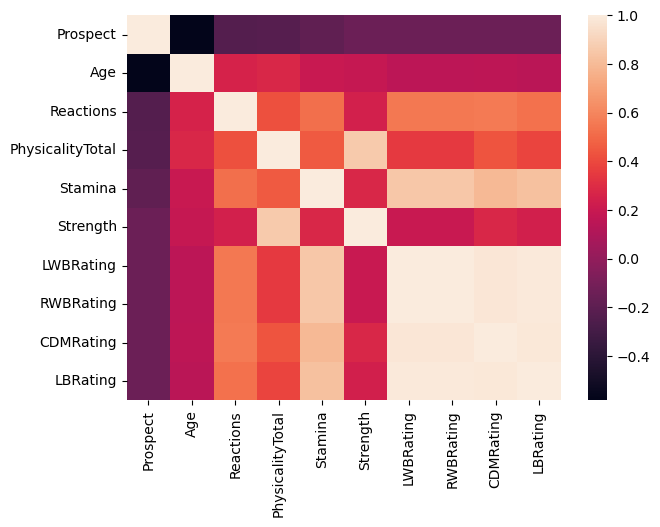

In [7]:
plt.figure(figsize = (7,5))
sns.heatmap(numeric_df[top_10_corr.index].corr())

plt.show()

In [8]:
prospect_rate = train['Prospect'].value_counts()
prospect_rate

Prospect
0    1929
1    1090
Name: count, dtype: int64

**주발 비율 시각화**

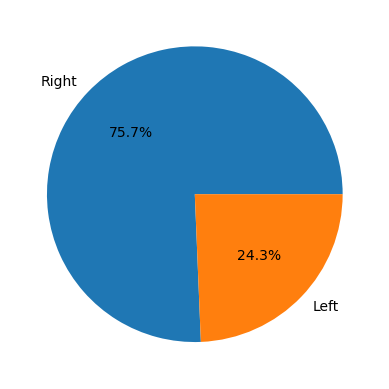

In [9]:
foot_rate = train['PreferredFoot'].value_counts()

plt.pie(x = foot_rate, labels=['Right', 'Left'], autopct='%1.1f%%')
plt.show()

**포지션 분포 시각화**

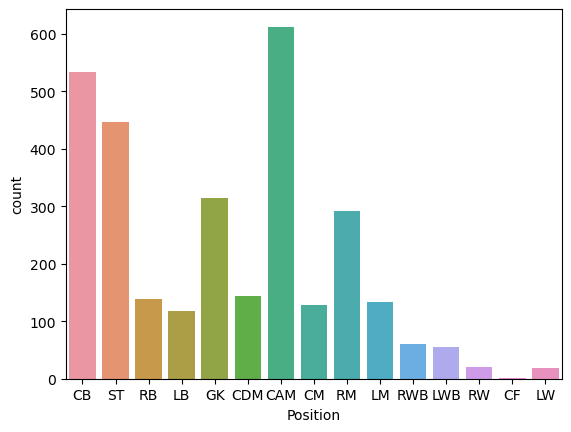

In [10]:
sns.countplot(x=train['Position'])
plt.show()

**유망 여부 비율 시각화**

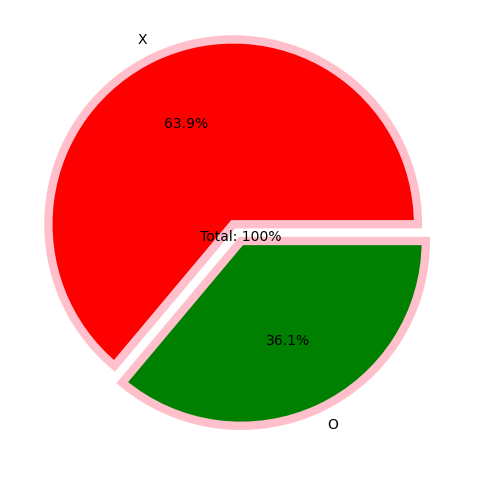

In [11]:
labels = ['X', 'O']
colors = ['red', 'green']
explode = (0.1, 0)

plt.figure(figsize=(6, 6))
plt.pie(x = train['Prospect'].value_counts(),
        labels=labels,
        colors=colors,
        explode=explode,
        autopct='%1.1f%%',
        wedgeprops={'linewidth': 6, 'edgecolor': 'pink'}
)

plt.text(x = 0, y = 0, s = 'Total: 100%', horizontalalignment='center')
plt.show()

**포지션에 따른 유망 여부 빈도 확인**

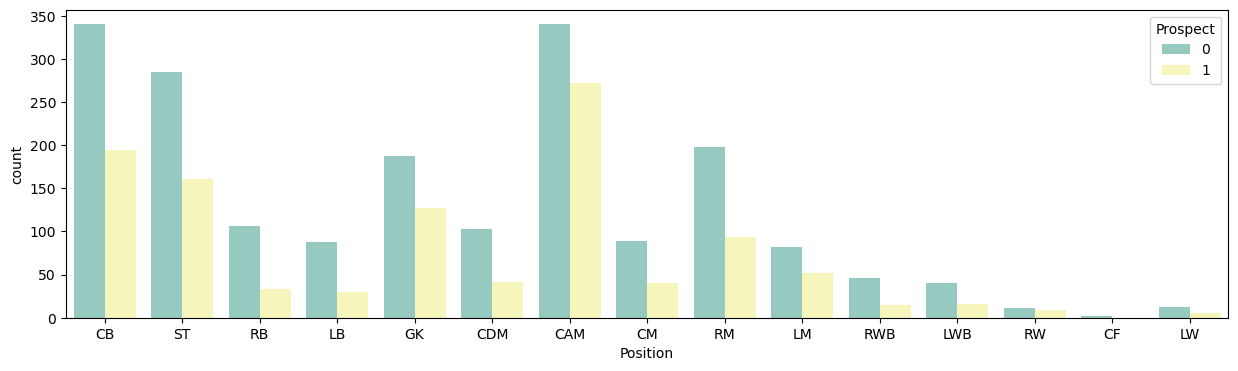

In [12]:
plt.figure(figsize=(15, 4))
sns.countplot(data=train, x=train['Position'], hue='Prospect', palette='Set3')
plt.show()

# 데이터 전처리

**특성 데이터와 예측 데이터 나누기**

범주형 피처 drop

**범주형 피처 One-Hot Encoding**

In [13]:
ohe = OneHotEncoder()
train_encoded = ohe.fit_transform(train[['Position']]).toarray()
test_encoded = ohe.fit_transform(test[['Position']]).toarray()

print(train_encoded)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
train_encoded_df = pd.DataFrame(train_encoded, columns=ohe.get_feature_names_out(['Position']))
test_encoded_df = pd.DataFrame(test_encoded, columns=ohe.get_feature_names_out(['Position']))

In [15]:
train = pd.concat([train, train_encoded_df], axis=1)
test = pd.concat([test, test_encoded_df], axis=1)

train.head()

,ID,Age,Height,Weight,Position,PreferredFoot,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,...,Position_GK,Position_LB,Position_LM,Position_LW,Position_LWB,Position_RB,Position_RM,Position_RW,Position_RWB,Position_ST
0,TRAIN_0000,21,182,82,CB,Right,Medium,Medium,4.6377,2.1053,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TRAIN_0001,21,160,75,ST,Left,High,Medium,7.3913,7.3684,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,TRAIN_0002,18,165,60,RB,Right,Medium,Medium,6.2319,3.2895,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,TRAIN_0003,20,190,72,CB,Right,Medium,Medium,4.7826,1.0526,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,TRAIN_0004,21,181,77,ST,Right,High,Medium,8.2609,7.3684,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [16]:
not_numeric = ['ID', 'Position', 'PreferredFoot', 'AttackingWorkRate', 'DefensiveWorkRate']

train_transfered = train.drop(not_numeric, axis = 1)
test_transfered = test.drop(not_numeric, axis = 1)

In [17]:
# Prospect와의 상관관계가 높은 상위 7개 피처 추출
abs_corr = abs(train_transfered.corr()['Prospect'])
abs_corr_sort = abs_corr.sort_values(ascending=False)[1:8]
col_names = abs_corr_sort.index
col_names

Index(['Age', 'Reactions', 'PhysicalityTotal', 'Stamina', 'Strength',
       'RWBRating', 'LWBRating'],
      dtype='object')

In [18]:
x_train = train_transfered[col_names]
y_train = train_transfered['Prospect']

In [19]:
# 학습/검증셋 분리
train_x, val_x, train_y, val_y = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [20]:
# 모델 학습
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=5000)
model.fit(train_x, train_y)

LogisticRegression(max_iter=5000)

In [21]:
# 검증데이터에대한 micro F1 score 평가
from sklearn.metrics import f1_score

val_pred = model.predict(val_x)
score = f1_score(val_y, val_pred, average='micro')

print('Micro F1 Score: ',score)

Micro F1 Score:  0.7533112582781456


In [22]:
# test셋 예측
test_x = test_transfered[col_names]

y_pred = model.predict(test_x)
y_pred

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [23]:
# 예측 결과 submission에 추가
submission['Prospect'] = y_pred
submission.head()

,ID,Prospect
0,TEST_0000,1
1,TEST_0001,1
2,TEST_0002,1
3,TEST_0003,0
4,TEST_0004,1


In [24]:
# 파일 저장
submission.to_csv('submission.csv', index=False)